In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time

import re

from datetime import datetime

#librerias de ML
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score



In [3]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [4]:
df = contract.merge(phone, how='left')
df = df.merge(internet, how='left')
df = df.merge(personal, how='left')
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,NaN,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   MultipleLines     6361 non-null   object 
 9   InternetService   5517 non-null   object 
 10  OnlineSecurity    5517 non-null   object 
 11  OnlineBackup      5517 non-null   object 
 12  DeviceProtection  5517 non-null   object 
 13  TechSupport       5517 non-null   object 
 14  StreamingTV       5517 non-null   object 
 15  StreamingMovies   5517 non-null   object 
 16  gender            7043 non-null   object 


Al unir los datasets, las columnas respectivas a los servicios(phone y internet) contienen valor nulos debido a que hay clientes que solo tienen uno de estos servicios. Reemplazaremos estos valores nulos con la palabra "non-contracted" para identificar esos casos.  

In [6]:
#reemplazar valores nulos
df.fillna("non-contracted", inplace=True)
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,non-contracted,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,non-contracted,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,non-contracted,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No


In [7]:
#crear funcion para cambiar nombres de columnas
def to_snake_case(name):
    name = name.replace(' ', '_')
    s1 = re.sub('(.)([A-Z][a-z]+)',r'\1_\2', name) 
    
    return re.sub('([a-z0-9])([A-Z])',r'\1_\2',s1).lower()

#renombrar columnas usando la funcion snake case
df.columns = [to_snake_case(col) for col in df.columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  gender             7043 

tambien cambiaremos la columna begin_date a datetime

In [9]:
#Convertir begin_date a datetime

df['begin_date'] = pd.to_datetime(df['begin_date'])

ahora en el caso de la columna "total_charges" el cual contiene registros sin valores númericos serán filtrados debido a que forman menos del 1% del datatset. Estos casos se deben a que todavía no se ha cumplido el periodo de contrato de paga

In [10]:
#Filtrar los registros donde la columna 'B' contiene un espacio en blanco
df = df[df['total_charges']!= ' ']
df['total_charges'] = df['total_charges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7032 non-null   object        
 1   begin_date         7032 non-null   datetime64[ns]
 2   end_date           7032 non-null   object        
 3   type               7032 non-null   object        
 4   paperless_billing  7032 non-null   object        
 5   payment_method     7032 non-null   object        
 6   monthly_charges    7032 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   multiple_lines     7032 non-null   object        
 9   internet_service   7032 non-null   object        
 10  online_security    7032 non-null   object        
 11  online_backup      7032 non-null   object        
 12  device_protection  7032 non-null   object        
 13  tech_support       7032 non-null   object        
 14  streamin

/tmp/ipykernel_197/2474618623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_charges'] = df['total_charges'].astype(float)


In [11]:
#Agregar columna churn
df['churn'] = df['end_date'].apply(lambda x: 0 if x == 'No' else 1)

/tmp/ipykernel_197/4159697194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn'] = df['end_date'].apply(lambda x: 0 if x == 'No' else 1)


In [12]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,non-contracted,DSL,...,Yes,No,No,No,No,Female,0,Yes,No,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,No,DSL,...,No,Yes,No,No,No,Male,0,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,...,Yes,No,No,No,No,Male,0,No,No,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,non-contracted,DSL,...,No,Yes,Yes,No,No,Male,0,No,No,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,...,No,No,No,No,No,Female,0,No,No,1


In [13]:
#Establecer variables númericas y categóricas
numeric_columns = ['monthly_charges','total_charges']
categorical_columns = list(set(df.columns) - set(numeric_columns) - set(['customer_id','begin_date','end_date']))


In [14]:
categorical_columns

['tech_support',
 'streaming_movies',
 'senior_citizen',
 'online_security',
 'paperless_billing',
 'type',
 'multiple_lines',
 'device_protection',
 'streaming_tv',
 'payment_method',
 'gender',
 'dependents',
 'churn',
 'online_backup',
 'partner',
 'internet_service']

monthly_charges:
Median: 70.35
Mean: 64.79820819112628

total_charges:
Median: 1397.475
Mean: 2283.300440841866



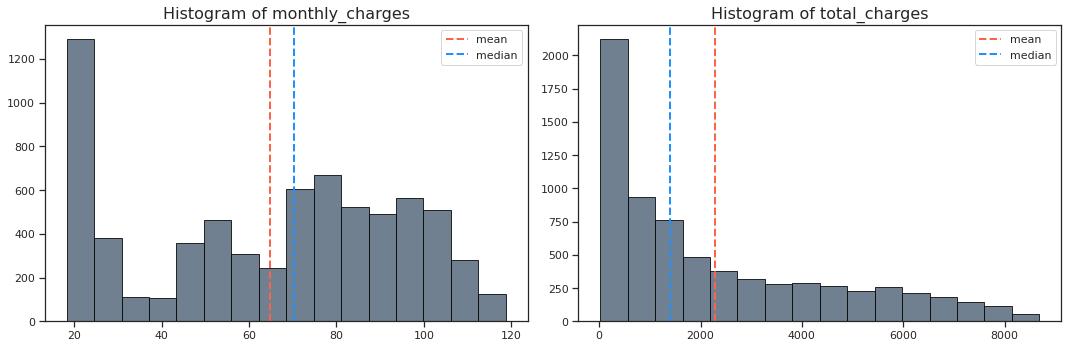

In [15]:
#Graficar histogramas por columna
sns.set(style= 'ticks')

num_vars = len(numeric_columns)
num_rows = num_vars // 2
num_rows += num_vars % 2

#Crear subgráficos
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))

#Aplanar el arreglo de ejes para que podamos iterar sobre él facilmente
axes = axes.flatten()

#Iterar por cada columna númerica y crear histograma
for i,col in enumerate(numeric_columns):
    axes[i].hist(df[col], bins=16, color='slategray', edgecolor='black', linewidth=0.8)
    
    #dibujar linea para media y mediana
    mean_val = df[col].mean()
    median_val = df[col].median()
    mean_line = axes[i].axvline(mean_val, color='tomato', linestyle='dashed', linewidth=2)
    median_line = axes[i].axvline(median_val, color='dodgerblue', linestyle='dashed', linewidth=2)
    
    print(f'{col}:')
    print(f'Median: {median_val}')
    print(f'Mean: {mean_val}')
    print()
    
    #Añadir leyenda
    axes[i].legend([mean_line, median_line], ['mean','median'])
    axes[i].set_title(f'Histogram of {col}', fontsize = 16)
    
#Remover sub gráficos no usados
if len(numeric_columns)%2:
    for i in range(i+1, num_rows*2):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



monthly_charges:
Median: 70.35
Mean: 64.79820819112628

total_charges:
Median: 1397.475
Mean: 2283.300440841866



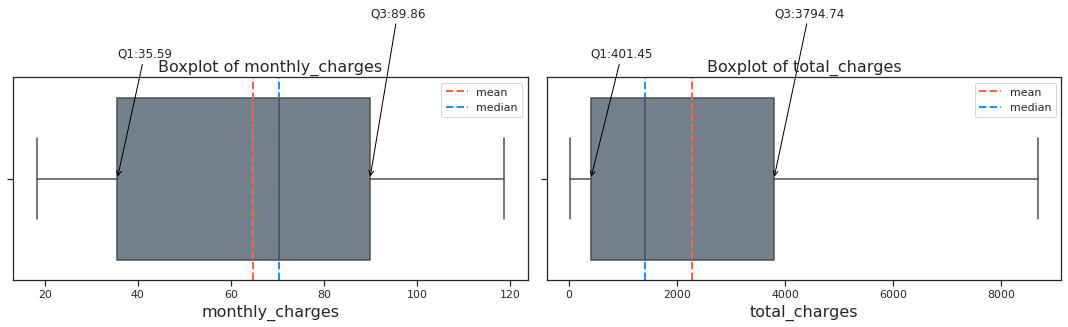

In [16]:
#Graficar boxplot por columna
sns.set(style= 'ticks')

num_vars = len(numeric_columns)
num_rows = num_vars // 2
num_rows += num_vars % 2

#Crear subgráficos
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))

#Aplanar el arreglo de ejes para que podamos iterar sobre él facilmente
axes = axes.flatten()

#Iterar por cada columna númerica y crear histograma
for i,col in enumerate(numeric_columns):
    sns.boxplot(x=df[col],color='slategray', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize = 20, weight='bold')
    axes[i].set_xlabel(col, fontsize = 16)
    
    #dibujar linea para media y mediana
    mean_val = df[col].mean()
    median_val = df[col].median()
    q1_val = df[col].quantile(0.25)
    q3_val = df[col].quantile(0.75)
    
    mean_line = axes[i].axvline(mean_val, color='tomato', linestyle='dashed', linewidth=2)
    median_line = axes[i].axvline(median_val, color='dodgerblue', linestyle='dashed', linewidth=2)
    
    #Anotate the lines
    axes[i].annotate(f'Q1:{q1_val:.2f}', xy=(q1_val,0), xytext=(q1_val,-0.6),textcoords='data',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),fontsize=12)
    axes[i].annotate(f'Q3:{q3_val:.2f}', xy=(q3_val,0), xytext=(q3_val,-0.8),textcoords='data',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),fontsize=12)
    
    print(f'{col}:')
    print(f'Median: {median_val}')
    print(f'Mean: {mean_val}')
    print()
    
    #Añadir leyenda
    axes[i].legend([mean_line, median_line], ['mean','median'])
    axes[i].set_title(f'Boxplot of {col}', fontsize = 16)
    
#Remover sub gráficos no usados
if len(numeric_columns)%2:
    for i in range(i+1, num_rows*2):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Analizando nuestros histogramas podemos extraer las siguientes primeras conclusiones importantes:

**.monthly charges**: muestra un sesgo hacia la izquierda donde la mayoria de las cargas mensuales se concentran entre los 35 y 90 aproximadamente. No se muestran valores atípicos.

**.total charges**: muestra un sesgo hacia la derecha donde la mayoria de las cargas totales se concentran entre los 400 y 3800 aproximadamente. No se muestran valores atípicos.

Como hemos podido verificar tanto los cargos mensuales como totales muestran sesgos en su distribución. Sin embargo, no parecen mostrar valores atípicos que deban preocuparnos. 

## Preparación de datos ##

Previo a crear a nuestros modelos los prepararemos realizando tanto la codificación de datos como la estandarización y separación en conjunto de entrenamiento y test. Asimismo, agregaremos una nueva variable que tome en cuenta la cantidad de tiempo activo de un contrato en días. Para los contratos que no tienen fecha de fin, utilizaremos la última fecha registrada en 'end_date'(2020-01-01)

In [17]:
#Verificar última fecha en 'end_date'

df['end_date'].value_counts()

No                     5163
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

In [18]:
#Crear una nueva columna con la diferencia en días

today = pd.Timestamp(datetime.now().date())

fixed_date = pd.Timestamp('2020-01-01')

df['day_difference'] = df['end_date'].apply(lambda x: pd.to_datetime(x) if x != 'No' else fixed_date) - df['begin_date']

#Convertir la diferencia en días a un número entero
df['day_difference'] = df['day_difference'].dt.days

/tmp/ipykernel_197/2190999519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_difference'] = df['end_date'].apply(lambda x: pd.to_datetime(x) if x != 'No' else fixed_date) - df['begin_date']
/tmp/ipykernel_197/2190999519.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_difference'] = df['day_difference'].dt.days


In [19]:
#Crear dataset final
df_final = df.drop(['customer_id', 'begin_date', 'end_date'],axis=1)

In [20]:
#Comprobar nueva variable
df_final.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,churn,day_difference
0,Month-to-month,Yes,Electronic check,29.85,29.85,non-contracted,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,0,0
1,One year,No,Mailed check,56.95,1889.50,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,0,1005
2,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,1,61
3,One year,No,Bank transfer (automatic),42.30,1840.75,non-contracted,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,0,1340
4,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No,1,61


In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7032 non-null   object 
 1   paperless_billing  7032 non-null   object 
 2   payment_method     7032 non-null   object 
 3   monthly_charges    7032 non-null   float64
 4   total_charges      7032 non-null   float64
 5   multiple_lines     7032 non-null   object 
 6   internet_service   7032 non-null   object 
 7   online_security    7032 non-null   object 
 8   online_backup      7032 non-null   object 
 9   device_protection  7032 non-null   object 
 10  tech_support       7032 non-null   object 
 11  streaming_tv       7032 non-null   object 
 12  streaming_movies   7032 non-null   object 
 13  gender             7032 non-null   object 
 14  senior_citizen     7032 non-null   int64  
 15  partner            7032 non-null   object 
 16  dependents         7032 

## Codificación de datos, escalado de datos y split de dataset ##

Realizamos la codificación y el escalado debido a que algunos modelos que se requieran de este proceso para que puedan funcionar correctamente. En el caso de los modelos relacionados a árboles, es mejor codificar nuestros datos categóricos a ordinales y para otros como el modelo XGBoost es mejor codificar las variables categóricas utilizando OHE. Tambien hay modelos que usaremos que no necesitan codificar los datos previamente como: CatBoost y LightGBM. 

**Codificación OHE**

In [22]:
#Establecer columnas categóricas y numéricas
numeric_columns = ['monthly_charges', 'total_charges', 'senior_citizen', 'day_difference']
categorical_columns = list(set(df_final.columns) - set(numeric_columns) - set(['churn']))

In [23]:
#Codificar las características categóricas
df_ohe = pd.get_dummies(df_final, drop_first=True)

#Escalar los datos numéricos
scaler = StandardScaler()
scaler.fit(df_ohe[numeric_columns])
df_ohe[numeric_columns] = scaler.transform(df_ohe[numeric_columns])
df_ohe.head()

,monthly_charges,total_charges,senior_citizen,churn,day_difference,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,...,device_protection_non-contracted,tech_support_Yes,tech_support_non-contracted,streaming_tv_Yes,streaming_tv_non-contracted,streaming_movies_Yes,streaming_movies_non-contracted,gender_Male,partner_Yes,dependents_Yes
0,-1.161694,-0.994194,-0.440327,0,-1.299615,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,-0.260878,-0.173740,-0.440327,0,0.054182,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.363923,-0.959649,-0.440327,1,-1.217445,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.747850,-0.195248,-0.440327,0,0.505447,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.196178,-0.940457,-0.440327,1,-1.217445,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
El escalado de datos se realiza por separado para los conjuntos de entrenamiento y prueba.
Cuando escalas tus datos, estás ajustando sus valores para que tengan una escala uniforme.
Imagina esto: Si escalas todo el conjunto de datos (entrenamiento + prueba) juntos, es posible que los valores de prueba influyan en la escala de entrenamiento y viceversa.
    
Esto podría dar lugar a un sesgo en tus resultados y hacer que tu modelo parezca mejor de lo que realmente es.

**Para evitar este problema, siempre debes realizar el escalado de forma independiente en cada conjunto.**

</div>

In [24]:
#Determinar features y target del modelo
features_ohe = df_ohe.drop('churn', axis=1)
target_ohe = df_ohe['churn']

#Dividir nuestro dataset en conjunto de entrenamiento y prueba 75:25
features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(
   features_ohe,
   target_ohe,
   test_size = 0.25,
   random_state = 12345

)

#Comprobar división
print(f'Tamaño del conjunto de entrenamiento OHE: {features_train_ohe.shape},{target_train_ohe.shape}')
print(f'Tamaño del conjunto de prueba OHE: {features_test_ohe.shape},{target_test_ohe.shape}')

Tamaño del conjunto de entrenamiento OHE: (5274, 29),(5274,)
Tamaño del conjunto de prueba OHE: (1758, 29),(1758,)


**Codificación de etiquetas**

In [25]:
#Crear una copia de nuestro dataset final
df_ordinal = df_final.copy().reset_index(drop=True)

#Codificar las características categóricas
encoder = OrdinalEncoder()
encoder.fit(df_ordinal[categorical_columns])
df_ordinal[categorical_columns] = pd.DataFrame(encoder.transform(df_ordinal[categorical_columns]), columns=categorical_columns)
df_ordinal.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,churn,day_difference
0,0.0,1.0,2.0,29.85,29.85,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0
1,1.0,0.0,3.0,56.95,1889.50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0,1005
2,0.0,1.0,3.0,53.85,108.15,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,1,61
3,1.0,0.0,0.0,42.30,1840.75,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0,1340
4,0.0,1.0,2.0,70.70,151.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,61


In [26]:
#Determinar features y target del modelo
features_ordinal = df_ordinal.drop('churn',axis=1)
target_ordinal = df_ordinal['churn']

#Dividir nuestro dataset en conjunto de entrenamiento y prueba 75:25
features_train_ordinal, features_test_ordinal, target_train_ordinal, target_test_ordinal = train_test_split(
   features_ordinal,
   target_ordinal,
   test_size=0.25,
   random_state=12345

) 

#Comprobar división
print(f'Tamaño del conjunto de entrenamiento ordinal: {features_train_ordinal.shape},{target_train_ordinal.shape}')
print(f'Tamaño del conjunto de prueba ordinal: {features_test_ordinal.shape},{target_test_ordinal.shape}')

Tamaño del conjunto de entrenamiento ordinal: (5274, 18),(5274,)
Tamaño del conjunto de prueba ordinal: (1758, 18),(1758,)


## Análisis de equilibrio de clases ##

Ahora que tenemos nuestra data preparada analizaremos el equilibrio de clases, es decir la proporción de los valores de nuestro target 'churn'. Los desequilibrios de clase pueden afectar el rendimiento de nuestro modelos y podrían causar obtener resultados no deseados. Previo a hacer el análisis, hagamos una prueba de consistencia que servirá como punto de partida para los demás modelos, es decir que será como nuestro modelo de mínimo resultado que nuestros demás modelos deberían superar.  

**Prueba de consistencia**

In [27]:
#Desarrollar modelo de árbol de decisiones
dt_model = DecisionTreeClassifier(random_state=12345)
dt_model.fit(features_train_ordinal, target_train_ordinal)
target_prob_dt = dt_model.predict_proba(features_test_ordinal)[:,1]

#Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal, target_prob_dt)
print(auc_roc)

0.7234338747099768


**Distribución de target**

0    0.734215
1    0.265785
Name: churn, dtype: float64


<AxesSubplot:>

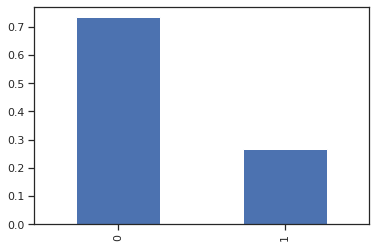

In [28]:
#Analizar distribución de clases
class_frecuency = df_ordinal['churn'].value_counts(normalize=True)
print(class_frecuency)
class_frecuency.plot(kind='bar')

Se puede observar que sí existe un desequilibrio de clases, los resultados negativos(0) son de mayor proporción en nuestros datos albergando alrededor del 70% de estos. 

**Creación de modelo constante**

Nuestro mínimo AUC-ROC esperado nuestros modelos debe superar 0.824 de otra manera debemos suponer que nuestro modelo no está funcionando correctamente.

In [29]:
#Crear modelo constante y analizando su precisión en función al objetivo del modelo
target_pred_constant = pd.Series(0, index=target_ordinal.index)
print(accuracy_score(target_ordinal, target_pred_constant))

0.7342150170648464


**Conclusión**

Podemos concluir que nuestros datos si cuentan con un desequilibrio de clases que debemos tratar para que nuestros modelos obtengan el mayor rendimiento posible.

## Mejora de calidad del modelo ##

Para poder mejorar nuestros modelos utilizaremos tres técnicas de ajuste de clases: ajuste de peso de clase, sobremuestreo y submuestreo. Para el primer caso, este se hará al momento de crear cada modelo y para los demás utilizaremos una función para tratar nuestros conjuntos de entrenamiento y test obtener el sobremuestreo y submuestreo. 

**Ajuste de peso de clase**

Como mencionamos anteriormente el ajuste de peso de clase lo haremos al crear cada modelo. Sin embargo, pondremos un ejemplo de este.

In [30]:
#Realizar un ajuste de peso a nuestro modelo 
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train_ordinal, target_train_ordinal)
target_prob_dt = dt_model.predict_proba(features_test_ordinal)[:,1]

#Calcular AUC-ROC
auc_roc= roc_auc_score(target_test_ordinal, target_prob_dt)

print(f'AUC-ROC del modelo de árbol de decisión: {auc_roc: 3f} ')

AUC-ROC del modelo de árbol de decisión:  0.723434 


**Sobremuestreo**

In [31]:
#Crear función para obtener sobremuestreo

def upsample(features, target, repeat):
    #Dividir los datos en observación negativas y positivas
    features_zeros = features[target==0]
    features_ones = features[target == 1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    #Duplicar las observaciones positivas
    features_upsampled = pd.concat([features_zeros]+ [features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones]*repeat)
    
    #Barajar los datos 
    features_upsampled, target_upsampled = shuffle(
       features_upsampled, target_upsampled, random_state=12345
    ) 
    
    return features_upsampled, target_upsampled


In [32]:
#Aplicar función para data con codificación de etiquetas
features_upsampled_ordinal, target_upsampled_ordinal = upsample(
   features_train_ordinal, target_train_ordinal, 3
)


In [33]:
#Comprobar sobremuestreo de datos objetivos
target_upsampled_ordinal.value_counts(normalize=True)

1    0.521158
0    0.478842
Name: churn, dtype: float64

In [34]:
#Aplicar función para data con codificación ONE-HOT
features_upsampled_ohe, target_upsampled_ohe = upsample(
   features_train_ohe, target_train_ohe, 3
)

In [35]:
#Comprobar sobremuestreo de datos objetivos
target_upsampled_ohe.value_counts(normalize=True)

1    0.521158
0    0.478842
Name: churn, dtype: float64

**Submuestreo**

In [36]:
#Crear función para obtener submuestreo

def downsample(features, target, fraction):
    #Dividir los datos en observación negativas y positivas
    features_zeros = features[target==0]
    features_ones = features[target == 1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    #Descartar de manera aleatoria observaciones de clase 0 usando sample()
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)]+[features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)]+[target_ones])
    
    #Barajar los datos 
    features_downsampled, target_downsampled = shuffle(
       features_downsampled, target_downsampled, random_state=12345
    ) 
    
    return features_downsampled, target_downsampled


In [37]:
#Aplicar función para data con codificación de etiquetas, obtenemos solo 10% de las observaciones de clase 0
features_downsampled_ordinal, target_downsampled_ordinal = downsample(
   features_train_ordinal, target_train_ordinal, 0.37
)


In [39]:
#Comprobar submuestreo de datos objetivos
target_downsampled_ordinal.value_counts(normalize=True)

0    0.504937
1    0.495063
Name: churn, dtype: float64

In [40]:
#Aplicar función
features_downsampled_ohe, target_downsampled_ohe = downsample(
   features_train_ohe, target_train_ohe, 0.37
)

In [41]:
#Comprobar submuestreo de datos objetivos
target_downsampled_ohe.value_counts(normalize=True)

0    0.504937
1    0.495063
Name: churn, dtype: float64

## Creación de modelos ##

Ahora procederemos con la creación de modelos aplicando las técnicas de ajuste de clase. Usaremos como métrica de evaluación auc-roc para los modelos con el objetivo de tener el mayor porcentaje posible. Asimismo, previo a cada creación de modelos ajustaremos los hiperparámetros de cada modelo utilizando GridSearchCV.   

**Árbol de decisión**

**Ajuste de hiperparametros**

In [45]:
#Establecer los hiperparametros de árbol de decisión
params_dt = {
    'max_depth': [2,4,6,8,10,12,14],
    'min_samples_split': [2,4,6,8,10,12,14],
    'min_samples_leaf': [2,4,6,8,10,12,14]
}

#Usar la función GridSearchCV y pasamos los hiperparametros establecidos, la métrica y el valor para la validación cruzada
gridSearch_dt = GridSearchCV(
   estimator = DecisionTreeClassifier(random_state=12345),
   param_grid = params_dt,
    
)

#Encontrar nuestro modelo para encontrar los mejores hiperparametros
start = time.time()
gridSearch_dt.fit(features_train_ordinal, target_train_ordinal)
end = time.time()
print(f'Tiempo de ajuste de hiperparametros de Árbol de Decisión:{end-start: .3f}s')

#Encontrar los mejores hiperparametros
best_params = gridSearch_dt.best_params_
print(f'Mejores hiperparametros: {best_params}')

Tiempo de ajuste de hiperparametros de Árbol de Decisión: 36.874s
Mejores hiperparametros: {'max_depth': 14, 'min_samples_leaf': 12, 'min_samples_split': 2}


**Ajuste de peso de clase**

In [47]:
#Entrenar el modelo de arbol de decisión
start_train = time.time()
dt_model = DecisionTreeClassifier(**best_params, random_state=12345, class_weight='balanced')
dt_model.fit(features_train_ordinal, target_train_ordinal)
end_train=time.time()

#Realizamos predicciones
start_test = time.time()
target_prob_dt = dt_model.predict_proba(features_test_ordinal)[:,1]
end_test = time.time()

#Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal,target_prob_dt)

print(f'AUC-ROC del modelo de Árbol de Decisión: {auc_roc: .3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train: .3f}s')
print(f'Tiempo de prueba del modelo: {end_train - start_train: .3f}s')

AUC-ROC del modelo de Árbol de Decisión:  0.851
Tiempo de entrenamiento del modelo:  0.034s
Tiempo de prueba del modelo:  0.034s


**Sobremuestreo de clase**

In [48]:
#Entrenar el modelo de arbol de decisión
start_train = time.time()
dt_model = DecisionTreeClassifier(**best_params, random_state=12345)
dt_model.fit(features_upsampled_ordinal, target_upsampled_ordinal)
end_train=time.time()

#Realizamos predicciones
start_test = time.time()
target_prob_dt = dt_model.predict_proba(features_test_ordinal)[:,1]
end_test = time.time()

#Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal,target_prob_dt)

**Submuestreo de clase**

In [49]:
#Entrenar el modelo de arbol de decisión
start_train = time.time()
dt_model = DecisionTreeClassifier(**best_params, random_state=12345)
dt_model.fit(features_downsampled_ordinal, target_downsampled_ordinal)
end_train=time.time()

#Realizamos predicciones
start_test = time.time()
target_prob_dt = dt_model.predict_proba(features_test_ordinal)[:,1]
end_test = time.time()

#Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal,target_prob_dt)

print(f'AUC-ROC del modelo de Árbol de Decisión: {auc_roc: .3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train: .3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test: .3f}s')

AUC-ROC del modelo de Árbol de Decisión:  0.854
Tiempo de entrenamiento del modelo:  0.018s
Tiempo de prueba del modelo:  0.002s


El mejor resultado con el modelo de árbol de decisión es de un auc-roc de 0.869 utilizando sobremuestro de clases

**Bosque Aleatorio**

**Ajuste de hiperparametros**

In [54]:
#Establecer los hiperparametros de árbol de decisión
params_rf = {
    'n_estimators': [10,20,40,60,80,100],
    'max_depth': [2,4,6,8,10,12],
    'min_samples_split':[2,4,6],
    'min_samples_leaf': [1,2,4]
}

#Usar la función GridSearchCV y pasamos los hiperparametros establecidos, la métrica y el valor para la validación cruzada
gridSearch_rf = GridSearchCV(
   estimator = RandomForestClassifier(random_state=12345),
   param_grid = params_rf,
   scoring = 'roc_auc',
   cv=3,
   n_jobs=-1
    
)

#Encontrar nuestro modelo para encontrar los mejores hiperparametros
start = time.time()
gridSearch_rf.fit(features_train_ordinal, target_train_ordinal)
end = time.time()
print(f'Tiempo de ajuste de hiperparametros de Bosque Aleatorio:{end-start: .3f}s')

#Encontrar los mejores hiperparametros
best_params = gridSearch_rf.best_params_
print(f'Mejores hiperparametros: {best_params}')

Tiempo de ajuste de hiperparametros de Bosque Aleatorio: 213.877s
Mejores hiperparametros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Ajuste de peso de clase**

In [55]:
#Entrenar el modelo de arbol de decisión
start_train = time.time()
rf_model = RandomForestClassifier(**best_params, random_state=12345, class_weight='balanced')
rf_model.fit(features_train_ordinal, target_train_ordinal)
end_train=time.time()

#Realizamos predicciones
start_test = time.time()
target_prob_rf = rf_model.predict_proba(features_test_ordinal)[:,1]
end_test = time.time()

#Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal,target_prob_rf)

print(f'AUC-ROC del modelo de Bosque Aleatorio: {auc_roc: .3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train: .3f}s')
print(f'Tiempo de prueba del modelo: {end_train - start_train: .3f}s')

AUC-ROC del modelo de Bosque Aleatorio:  0.879
Tiempo de entrenamiento del modelo:  0.627s
Tiempo de prueba del modelo:  0.627s


**Sobremuestreo de clases**

In [56]:
#Entrenar el modelo de bosque aleatorio
start_train = time.time()
rf_model = RandomForestClassifier(**best_params, random_state=12345)
rf_model.fit(features_upsampled_ordinal, target_upsampled_ordinal)
end_train=time.time()

#Realizamos predicciones
start_test = time.time()
target_prob_rf = rf_model.predict_proba(features_test_ordinal)[:,1]
end_test = time.time()

#Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal,target_prob_rf)

**Submuestreo de clases**

In [57]:
#Entrenar el modelo de bosque aleatorio
start_train = time.time()
rf_model = RandomForestClassifier(**best_params, random_state=12345)
rf_model.fit(features_downsampled_ordinal, target_downsampled_ordinal)
end_train=time.time()

#Realizamos predicciones
start_test = time.time()
target_prob_rf = rf_model.predict_proba(features_test_ordinal)[:,1]
end_test = time.time()

#Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal,target_prob_rf)

print(f'AUC-ROC del modelo de Bosque aleatorio: {auc_roc: .3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train: .3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test: .3f}s')

AUC-ROC del modelo de Bosque aleatorio:  0.873
Tiempo de entrenamiento del modelo:  0.411s
Tiempo de prueba del modelo:  0.041s


Para el modelo de Bosque Aleatorio el mejor resultado se dió utilizando un submuestreo de clase alcanzando un auc_roc de 0.873

## Conclusión ##

Luego de probar los modelos utilizando diferentes técnicas para tratar el desequilibrio de clases, el mejor auc-roc de 0.879 se obtuvo utilizando el modelo de Bosque Aleatorio con ajuste de peso de clase.